# Importing Basic Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

## Feature Extraction


### DictVectorizer

In [2]:
data = [{"age":4, "height":96.0},
        {"age":1, "height":73.9},
        {"age":3, "height":88.9},
        {"age":2, "height":81.6}]


In [3]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

## Data Imputation

### Data Imputation on Real World Dataset

In [4]:
from sklearn.impute import SimpleImputer

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names = cols)

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
print(heart_data.ca.unique())
print(heart_data.thal.unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [9]:
heart_data.replace('?', np.nan, inplace=True)

### Using SKlearn to impute the null values

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_T = imputer.transform(heart_data)
heart_data_T

array([[63.,  1.,  1., ...,  0.,  0.,  0.],
       [67.,  1.,  4., ...,  2.,  0.,  0.],
       [67.,  1.,  4., ...,  1.,  0.,  0.],
       ...,
       [57.,  1.,  4., ...,  3.,  0.,  0.],
       [57.,  0.,  2., ...,  1.,  0.,  0.],
       [38.,  1.,  3., ...,  0.,  1.,  0.]], shape=(303, 16))

# Feature Scaling
Feature scaling transforms feature values such that all the features are on the same scale.

In [11]:
cols = ['Sex', 'Length' , 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names= cols)

In [12]:
abalone_data.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1116,I,0.525,0.395,0.120,0.6080,0.2970,0.1395,0.1405,8
1798,M,0.600,0.495,0.175,1.3005,0.6195,0.2840,0.3285,11
1579,I,0.495,0.400,0.105,0.6020,0.2505,0.1265,0.1900,8
3129,F,0.630,0.490,0.170,1.2155,0.4625,0.2045,0.3105,10
3236,I,0.345,0.285,0.100,0.2225,0.0865,0.0580,0.0750,8
1910,F,0.580,0.500,0.165,0.9250,0.3700,0.1850,0.3005,10
3767,M,0.555,0.460,0.160,0.8600,0.3345,0.1935,0.2750,10
1921,M,0.605,0.470,0.180,1.1155,0.4790,0.2565,0.3210,10
1500,F,0.630,0.500,0.175,1.1105,0.4670,0.2680,0.3290,10
1328,I,0.570,0.450,0.145,0.7510,0.2825,0.2195,0.2215,10


In [13]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [14]:
abalone_data.replace({'Sex': {'M':1, 'F':2, 'I':3}}, inplace=True)

/var/folders/z8/nbvk5kgd18g2blb0t3nbxnmm0000gn/T/ipykernel_5455/460835693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  abalone_data.replace({'Sex': {'M':1, 'F':2, 'I':3}}, inplace=True)


In [15]:
y = abalone_data.pop('Rings')

In [16]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


<Axes: ylabel='Density'>

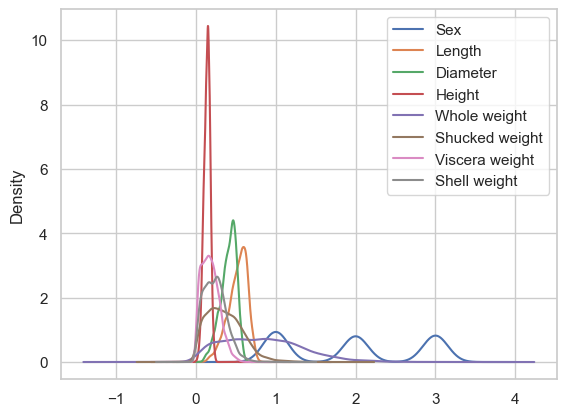

In [17]:
abalone_data.plot.kde()

<Axes: >

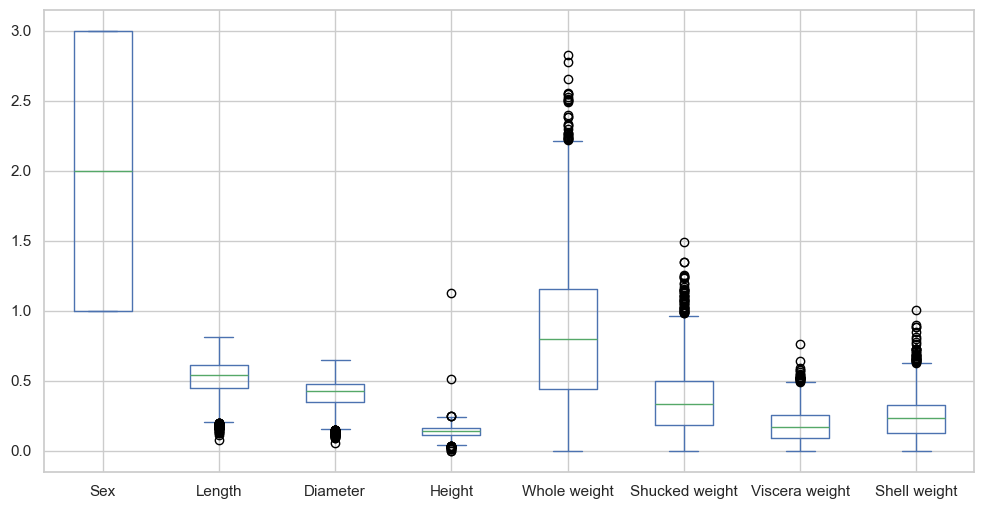

In [18]:
abalone_data.plot.box(figsize=(12, 6))


In [19]:
x= np.array([4, 2, 5, -2, -100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [20]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


In [21]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized

array([[0.        , 0.51351351, 0.5210084 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [0.        , 0.37162162, 0.35294118, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.5       , 0.61486486, 0.61344538, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [0.        , 0.70945946, 0.70588235, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.5       , 0.74324324, 0.72268908, ..., 0.35642233, 0.34298881,
        0.29347285],
       [0.        , 0.85810811, 0.84033613, ..., 0.63517149, 0.49506254,
        0.49177877]], shape=(4177, 8))

<Axes: >

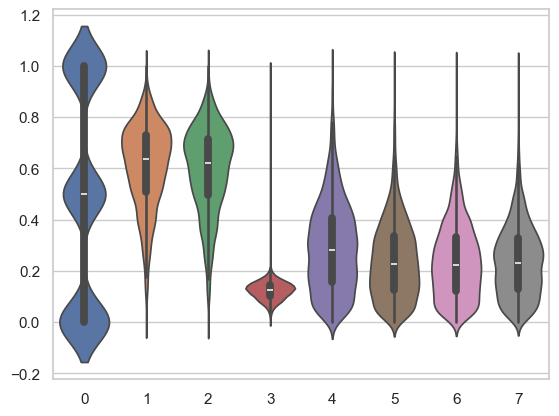

In [22]:
sns.violinplot(data=X_normalized)

# add_dummy_feature

In [23]:
X = np.array([[1,2],[3,4], [5,6], [7,8]])

from sklearn.preprocessing import add_dummy_feature

X_new = add_dummy_feature(X)
X_new

array([[1., 1., 2.],
       [1., 3., 4.],
       [1., 5., 6.],
       [1., 7., 8.]])

# Custom Transformer

In [24]:
from sklearn.preprocessing import FunctionTransformer

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [26]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_T = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_T, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


# Polynomial Transformer

In [27]:
from sklearn.preprocessing import PolynomialFeatures

wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop('quality', axis=1)


poly = PolynomialFeatures(degree = 2)
poly_wine_data = poly.fit_transform(wine_data)
pwd = pd.DataFrame(poly_wine_data)


In [28]:
pwd.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,0.995605,3.502278,0.558768,9.37932,12.3201,1.9656,32.994,0.3136,5.264,88.36
1,1.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,...,0.993610,3.189760,0.677824,9.76864,10.2400,2.1760,31.360,0.4624,6.664,96.04
2,1.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,...,0.994009,3.250220,0.648050,9.77060,10.6276,2.1190,31.948,0.4225,6.370,96.04
3,1.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,...,0.996004,3.153680,0.578840,9.78040,9.9856,1.8328,30.968,0.3364,5.684,96.04
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,0.995605,3.502278,0.558768,9.37932,12.3201,1.9656,32.994,0.3136,5.264,88.36


In [29]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

# Discretization

In [31]:
from sklearn.preprocessing import KBinsDiscretizer

In [32]:
wine_data = wine_data_copy.copy()

enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1,1)
X_binned = enc.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [33]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# Handling Categorical Features

## Ordinal Encoding

Assign numbers to categorical dataset, but not useful because model might get confused
- for example:
    - America = 1
    - India = 2
    - Mexico = 3

Now model might assume India = 2* America, which is not true, so we should use OneHotEncoder

## One-hot Encoding

In [34]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris_data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
ohe = OneHotEncoder(categories='auto')

iris_label = ohe.fit_transform(iris_data.label.values.reshape(-1,1))
iris_label.toarray()[:5]



array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [37]:
enc = OrdinalEncoder()
iris_label = np.array(iris_data['label'])

iris_label_T = enc.fit_transform(iris_label.reshape(-1,1))

np.unique(iris_label_T)

array([0., 1., 2.])

## Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder

iris_label = np.array(iris_data['label'])
enc = LabelEncoder()
label_int = enc.fit_transform(iris_label)
label_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Multi-label Binarizer

In [39]:
movie_genres = [{'action','comedy' },{'comedy'}, {'action','thriller'}, {'science-fiction', 'action', 'thriller'}]

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

## Using dummy Variables

In [41]:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


# Composite Transformer

## Column Transformer

In [42]:
x = [[20, 'male'],
[11.2, 'female'],
[15.6, 'female'],
[13.0, 'male'],
[18.6,'male'],
[16.4, 'female']]

x = np.array(x)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler', MaxAbsScaler(),[0]),
                        ('pass', 'passthrough', [0]),
                        ('encoder', OneHotEncoder(), [1])])

ct.fit_transform(x)

array([['1.0', '20', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

## TransformerTragetRegressor

In [1]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [ ]:
X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000, :], y[:2000]

transformer = MaxAbsScaler()
regressor = LinearRegression()

regr = TransformedTargetRegressor(regressor=regressor,transformer=transformer )

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)
regr.fit(X_train, y_train)
regr.score = (X_test, y_test)

raw_target_regr= LinearRegression().fit(X_train, y_train)
raw_target_regr.score(X_test, y_test)



# Feature Selection

## Variance Threshold

In [55]:
data = [{'age' :4 , 'height' : 96.0},
        {'age' :1 , 'height' : 73.9},
        {'age' :3 , 'height' : 88.9},
        {'age' :2 , 'height' : 81.6}]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)

data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [57]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new


array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

## SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.datasets import fetch_california_housing

In [ ]:
X_california, y_california = fetch_california_housing (return_X_y=True)
X, y = X[:2000, :], y[:2000]

skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X,y)
skb.get_feature_names_out()

## SelectPercentile

In [ ]:
from sklearn.feature_selection import SelectPercentile

sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X,y)

## GenericUnivariateSelect

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect

gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=3)
X_new = gus.fit_transform(X,y)

## Wrapper-Based Method

### RFE

In [64]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


X, y = make_friedman1(
    n_samples=200,   
    n_features=10,  
    noise=0.0,    
    random_state=42
)

estimator = LinearRegression()

selector = RFE(
    estimator=estimator,
    n_features_to_select=3,
    step=1
)

selector = selector.fit(X, y)

print("Selected features (True = kept):")
print(selector.support_)

print(f"Rank of each feature is : {selector.ranking_}")


Selected features (True = kept):
[ True  True False  True False False False False False False]
Rank of each feature is : [1 1 5 1 2 4 6 7 8 3]


### Select From Model

In [68]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X,y)

print (f'Coefficients of features: {estimator.coef_}')
print (f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:1]}')
t= np.argsort(np.abs(estimator.coef_))[-3: ]
model = SelectFromModel (estimator, max_features=3, prefit=True)
X_new = model.transform (X)
print (f'Shape of of feature matrix after feature selection: {X_new.shape}')

Coefficients of features: [ 7.37577975  6.62449455 -0.57425005 10.17776827  5.50066159 -1.03545169
  0.52137708  0.2309711  -0.22710265  1.56556661]
Indices of top 3 features: []
Shape of of feature matrix after feature selection: (200, 3)


### Sequential Feature Selector

In [69]:
from sklearn.feature_selection import SequentialFeatureSelector

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True  True False  True False False False False False False]


In [70]:
from sklearn.feature_selection import SequentialFeatureSelector

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True  True False  True False False False False False False]


# PCA

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [73]:
pca.components_

array([[-0.44925906,  0.52829869,  0.27568584, -0.02365874, -0.4413084 ,
         0.1209968 , -0.37973077,  0.11175197,  0.27534283,  0.02476724],
       [ 0.22979035,  0.01651881,  0.29033894,  0.40890918,  0.38351221,
         0.03317134, -0.14597019, -0.34640582,  0.61073392,  0.18148815]])

In [74]:
pca.explained_variance_

array([0.11941807, 0.1057203 ])

In [75]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

# Chaining Transformer

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
estimator = [('simpleImputer', SimpleImputer()),
             ('standardScaler', StandardScaler())]

pipe = Pipeline(steps=estimator)

In [77]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(SimpleImputer(), StandardScaler())

In [78]:
from sklearn.decomposition import PCA

pipe = make_pipeline(SimpleImputer(), PCA(), LinearRegression())

print(len(pipe.steps))

3


In [79]:
pipe.named_steps

{'simpleimputer': SimpleImputer(),
 'pca': PCA(),
 'linearregression': LinearRegression()}

In [80]:
pipe.steps[1]

('pca', PCA())

In [81]:
pipe.set_params(pca__n_components = 2)

,steps,"[('simpleimputer', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,n_components,2


## GridSearch with pipeline

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer= ['passthrough', SimpleImputer(), KNNImputer()],
                  clf = [SVC(), LogisticRegression()],
                  clf_c= [0.1,10,100])

grid_search = GridSearchCV(pipe, param_grid=param_grid)

## Catching Transformation

In [82]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

In [83]:
estimators = [('simpleImputer', SimpleImputer()), ('pca', PCA(2)),('regressor', LinearRegression())]
pipe = Pipeline(steps=estimators, memory = tempDirPath)

## Feature Union
Concatenates results of multiple transformer objects.

# Visualizing Pipelines

In [84]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('selector', ColumnTransformer([('select_first_4', 'passthrough', slice(0,4))])),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler()),])

cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(),[4]),])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ('cat_pipeline', cat_pipeline)])

In [85]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

,transformer_list,"[('num_pipeline', ...), ('cat_pipeline', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,transformers,"[('select_first_4', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


# Handle imbalanced data
Handle with either
- Oversampling
- Undersampling

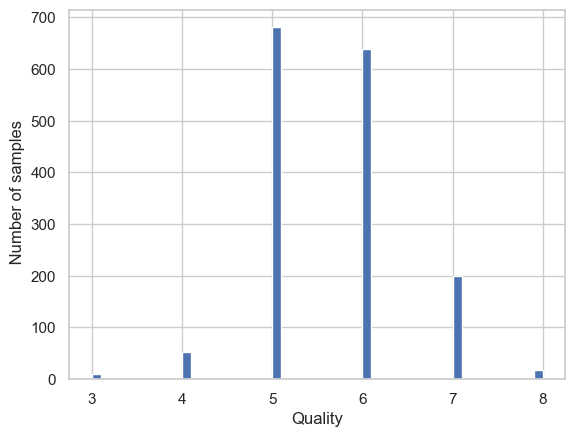

In [87]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/""winequality-red.csv", sep=";")

# display the histogram of the target variable 'quality'
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel(' Number of samples')
plt.show()

## Undersampling

In [88]:
from imblearn.under_sampling import RandomUnderSampler

In [89]:
from collections import Counter

X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state=0)
X_rus, y_rus = undersample.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))


original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


In [90]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
# ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))


original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})
